# Лабораторная работа №6
**Исследование результатов фильтрации дискретного сигнала с помощью рекурсивных фильтров, построенных на основе формул численного дифференцирования и интегрирования**

**Выполнили** студенты группы 2383 Борисов И.П., Иваницкий И.А.

**Цель работы.** Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью фильтров, основанных на формулах численного дифференцирования и интегрирования, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

---



# Теоретические основы цифровой обработки сигналов

## 1. Дискретизация сигнала

### Параметры дискретизации
- **Шаг дискретизации**: $T = 1$
- **Количество отсчётов**: $N = 32$
- **Дискретное время**: $n = 0, 1, 2, \dots, N-1$

### Модель сигнала
Сигнал формируется как сумма гармонических составляющих:
$$
x[n] = \sum_{k=0}^{10} A_k \cos(\omega_k^{(sig)} n + \varphi_k)
$$

### Параметры гармоник
1. **Частоты гармоник исходного сигнала**:
   $$
   \omega_k^{(sig)} = k \cdot 0.1\pi, \quad k = 0, 1, 2, \dots, 10
   $$
   Диапазон: $\omega_k^{(sig)} \in [0, \pi]$ (всего 11 гармоник)

2. **Амплитуды**:
   - Случайные целые числа: $A_k \in \{1, 2, \dots, 11\}$
   - После генерации выполняется нормализация:
     $$
     A_k^{\text{норм}} = \frac{A_k}{\sum_{k=0}^{10} A_k}
     $$

3. **Фазы**:
   $$
   \varphi_k \in [0, 0.5] \quad \text{(случайные значения)}
   $$

---

## 2. Дискретное преобразование Фурье (ДПФ)

### Определение ДПФ
Для последовательности $x[n]$ длины $N$:
$$
X[k] = \sum_{n=0}^{N-1} x[n] e^{-i \frac{2\pi}{N} kn}, \quad k = 0, 1, \dots, N-1
$$

### Амплитудный спектр
$$
|X[k]| = \sqrt{\text{Re}(X[k])^2 + \text{Im}(X[k])^2}
$$

### Частоты ДПФ
$$
\omega_k^{(DFT)} = \frac{2\pi k}{N}, \quad k = 0, 1, \dots, N-1
$$

### Свойства
- Периодичность: $X[k] = X[k + N]$
- Симметрия: $|X[k]| = |X[N-k]|$ для вещественных сигналов
- Соответствие частот: $\omega_k^{(DFT)}$ — частоты спектрального анализа

---

## 3. Нерекурсивные фильтры (FIR-фильтры)

### Общий вид передаточной функции
$$
H(\omega) = h_0 + 2\sum_{k=1}^{m} h_k \cos(k\omega)
$$

### Скользящее среднее
**Импульсная характеристика**:
$$
h[n] = 
\begin{cases} 
\frac{1}{M}, & 0 \le n \le M-1 \\
0, & \text{иначе}
\end{cases}
$$

**Частотная характеристика**:
$$
H(\omega) = \frac{1}{M} \sum_{n=0}^{M-1} e^{-i\omega n}
$$

**Аналитическая форма**:
$$
H(\omega) = \frac{e^{-i\omega (M-1)/2}}{M} \cdot \frac{\sin\left(\frac{M\omega}{2}\right)}{\sin\left(\frac{\omega}{2}\right)}
$$

**Амплитудно-частотная характеристика**:
$$
|H(\omega)| = \frac{1}{M} \left| \frac{\sin\left(\frac{M\omega}{2}\right)}{\sin\left(\frac{\omega}{2}\right)} \right|
$$

---

## 5. Частотный анализ фильтрации

### Связь спектров до и после фильтрации
$$
Y(z) = H(z)X(z)
$$
где:
- $Y(z)$ — Z-образ сигнала после фильтрации
- $H(z)$ — передаточная функция фильтра
- $X(z)$ — Z-образ исходного сигнала

### В частотной области
$$
Y(\omega) = H(\omega)X(\omega)
$$

### Процедура анализа
1. **Вычисление частотной характеристики фильтра**:
   - Аналитически (для скользящего среднего)
   - Численно через ДПФ коэффициентов фильтра

2. **Сравнение спектров**:
   - Исходный сигнал: $X[k]$
   - Отфильтрованный сигнал: $Y[k]$

3. **Проверка соответствия**:
   $$
   Y[k] \approx H\left(\omega_k^{(DFT)}\right) \cdot X[k]
   $$
   где $\omega_k^{(DFT)} = \frac{2\pi k}{N}$

### Критерии оценки
- Ослабление высокочастотных компонент ($\omega_k^{(sig)}$ с большими $k$)
- Сохранение низкочастотной структуры сигнала ($\omega_k^{(sig)}$ с малыми $k$)
- Минимальные фазовые искажения
  
---


## Постановка задачи

1.Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k \cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N = 31$).

2.Визуализировать исходные аналоговый и дискретизированный сигналы.

3.С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

4.Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

5.Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

6.С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

7.Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

8.Повторить п. 4–7 для следующих фильтров:  
a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.  
b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

9.Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.


# Выполнение работы
# Задания 1,2
Используется сигнал вида:

$$x[n] = \sum_{k=0}^{10} A_k \cos(\omega_k n + \phi_k)$$
где
- $\omega_k = 0.1\pi k$ (цифровые частоты от 0 до $\pi$)
- $A_k$ - случайные амплитуды от 1 до 11, нормированные так что $\sum A_k = 1$
- $\phi_k$ - случайные фазы от 0 до 0.5 радиан
- $N = 32$ отсчета

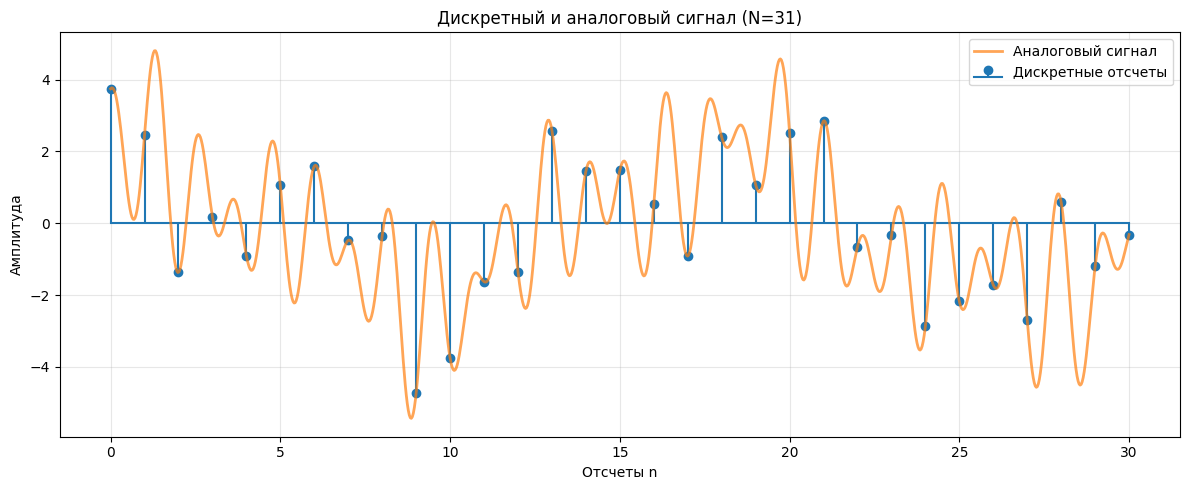

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(N=32, seed=None):
    np.random.seed(seed)
    num_components = 5
    amps = np.random.rand(num_components) * 2
    omegas = np.random.rand(num_components) * 2 * np.pi
    phases = np.random.rand(num_components) * 2 * np.pi
    x = np.zeros(N)
    n = np.arange(N)
    for A, w, phi in zip(amps, omegas, phases):
        x += A * np.cos(w * n + phi)
    return x, amps, omegas, phases
    
T = 1.0
N = 31
x, amps, omegas, phases = generate_signal(N=N, seed=42)

fig, ax = plt.subplots(figsize=(12, 5)) 

n = np.arange(N)
ax.stem(n, x, linefmt='C0-', markerfmt='C0o', basefmt='C0-', label='Дискретные отсчеты')

t_dense = np.linspace(0, N-1, 1000)
x_analog = np.zeros_like(t_dense)
for amp, omega, phase in zip(amps, omegas, phases):
    x_analog += amp * np.cos(omega * t_dense + phase)

ax.plot(t_dense, x_analog, 'C1-', alpha=0.7, linewidth=2, label='Аналоговый сигнал')

ax.set_xlabel('Отсчеты n')
ax.set_ylabel('Амплитуда')
ax.set_title(f'Дискретный и аналоговый сигнал (N={N})')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Задание 3
Дискретное преобразование Фурье

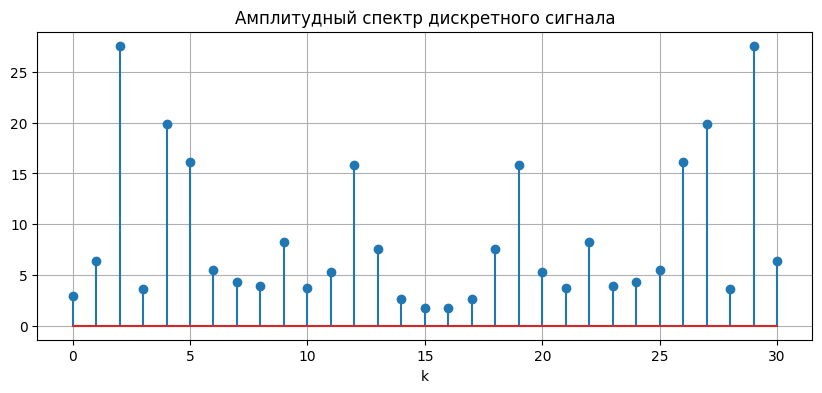

In [41]:
X = np.fft.fft(x)
freq_bins = np.arange(N)

plt.figure(figsize=(10, 4))
plt.stem(freq_bins, np.abs(X))
plt.title("Амплитудный спектр дискретного сигнала")
plt.xlabel("k")
plt.grid(True)
plt.show()


# Функция для заданий 4-7

In [42]:
def H_from_h(h, N):
    h_pad = np.zeros(N, dtype=complex)
    h_pad[:len(h)] = h
    return np.fft.fft(h_pad)

def linear_conv_via_fft(x, h):
    L = len(x) + len(h) - 1
    Xf = np.fft.fft(x, n=L)
    Hf = np.fft.fft(h, n=L)
    y_full = np.fft.ifft(Xf * Hf).real
    start = (len(h)-1)//2
    return y_full[start:start+len(x)]

def safe_divide(a, b, eps=1e-12):
    return np.divide(a, b, out=np.zeros_like(a, dtype=float), where=np.abs(b)>eps)

# Задания 4,5

### Линейное сглаживание дискретного сигнала по 5-ти и 9-ти точкам

Сглаживание осуществляется с помощью FIR-фильтра конечной длины (скользящего среднего).

### Определение фильтра

Фильтр по $M$ точкам:

$$
h[n] = 
\begin{cases}
\frac{1}{M}, & n = 0,1,\ldots,M-1 \\
0, & \text{иначе}
\end{cases}
$$

Здесь рассматриваем два фильтра:

- **5-точечный**: $ M = 5 $
- **9-точечный**: $ M = 9 $

### Частотная характеристика фильтра

Передаточная функция FIR-фильтра:

$$
H(\omega) = \frac{1}{M} \sum_{n=0}^{M-1} e^{-j\omega n}
$$

Аналитическая форма:

$$
H(\omega) = \frac{e^{-j\omega(M-1)/2}}{M} 
\cdot
\frac{\sin\left(\frac{M\omega}{2}\right)}{\sin\left(\frac{\omega}{2}\right)}
$$

Амплитудно-частотная характеристика:

$$
|H(\omega)| = \frac{1}{M}
\left|
\frac{\sin\left(\frac{M\omega}{2}\right)}{\sin\left(\frac{\omega}{2}\right)}
\right|
$$

Этот фильтр пропускает низкие частоты и подавляет высокие — то есть является **НЧ-фильтром**.


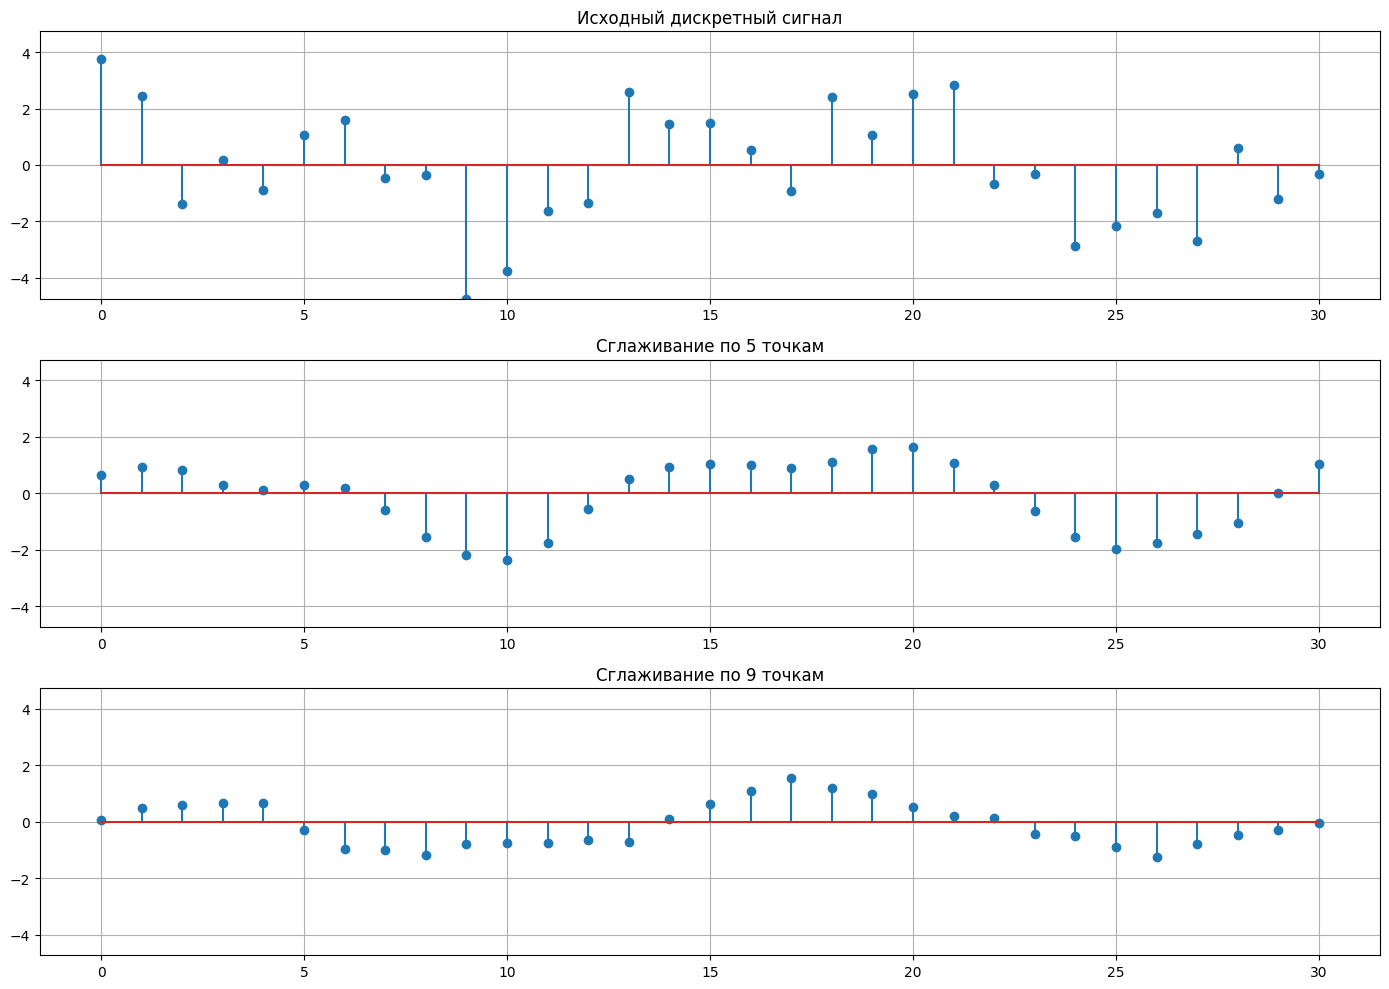

In [46]:
def apply_kernel_circular(signal: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    pad_size = len(kernel) // 2
    # Дополняем сигнал с циклическим продолжением
    y_padded = np.pad(signal, (pad_size, pad_size), mode='wrap')
    # Линейная свертка с дополненным сигналом
    y_full = np.convolve(y_padded, kernel, mode='full')
    # Берем только центральную часть той же длины, что и исходный сигнал
    start_idx = len(kernel) - 1
    return y_full[start_idx:start_idx + len(signal)]

h5 = np.ones(5) / 5
h9 = np.ones(9) / 9

y5 = apply_kernel_circular(x, h5) 
y9 = apply_kernel_circular(x, h9)  

n = np.arange(len(x))
y_max = max(
    np.max(np.abs(x)),
    np.max(np.abs(y5)),
    np.max(np.abs(y9))
)

plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.stem(n, x)
plt.title("Исходный дискретный сигнал")
plt.ylim(-y_max, y_max)
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n, y5)
plt.title("Сглаживание по 5 точкам")
plt.ylim(-y_max, y_max)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n, y9)
plt.title("Сглаживание по 9 точкам")
plt.ylim(-y_max, y_max)
plt.grid(True)

plt.tight_layout()
plt.show()


# Задание 6

## Спектральный анализ: исходный и отфильтрованные сигналы

Вычисляем **ДПФ** исходного дискретного сигнала $x[n]$ и отфильтрованных сигналов $y_5[n]$ $(M=5)$ и $y_9[n]$ $(M=9)$.


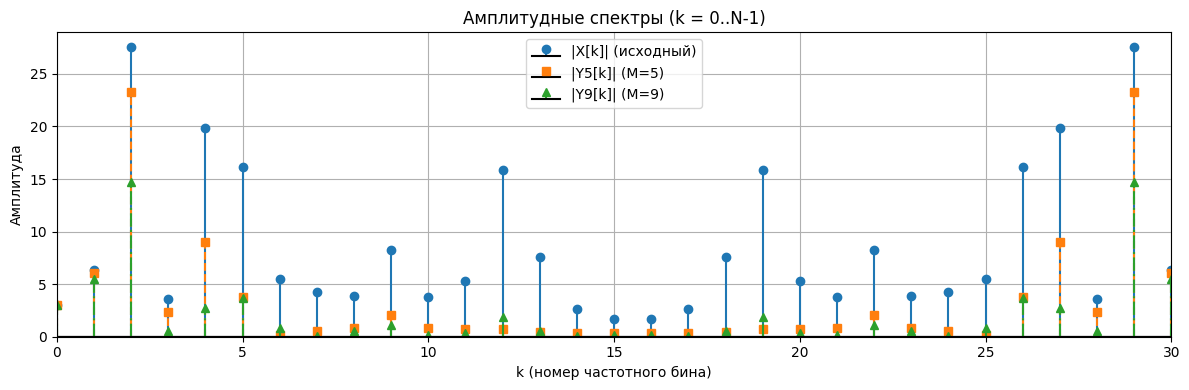

In [47]:
X = np.fft.fft(x, n=N)
Y5 = np.fft.fft(y5, n=N)
Y9 = np.fft.fft(y9, n=N)

mag_X  = np.abs(X)
mag_Y5 = np.abs(Y5)
mag_Y9 = np.abs(Y9)

k = np.arange(N)

ymax = max(mag_X.max(), mag_Y5.max(), mag_Y9.max())

plt.figure(figsize=(12,4))
plt.stem(k, mag_X,  linefmt='C0-', markerfmt='C0o', basefmt="k-", label='|X[k]| (исходный)')
plt.stem(k, mag_Y5, linefmt='C1--', markerfmt='C1s', basefmt="k-", label='|Y5[k]| (M=5)')
plt.stem(k, mag_Y9, linefmt='C2-.', markerfmt='C2^', basefmt="k-", label='|Y9[k]| (M=9)')
plt.title("Амплитудные спектры (k = 0..N-1)")
plt.xlabel("k (номер частотного бина)")
plt.ylabel("Амплитуда")
plt.ylim(0, ymax * 1.05)
plt.xlim(0, N-1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Задание 7

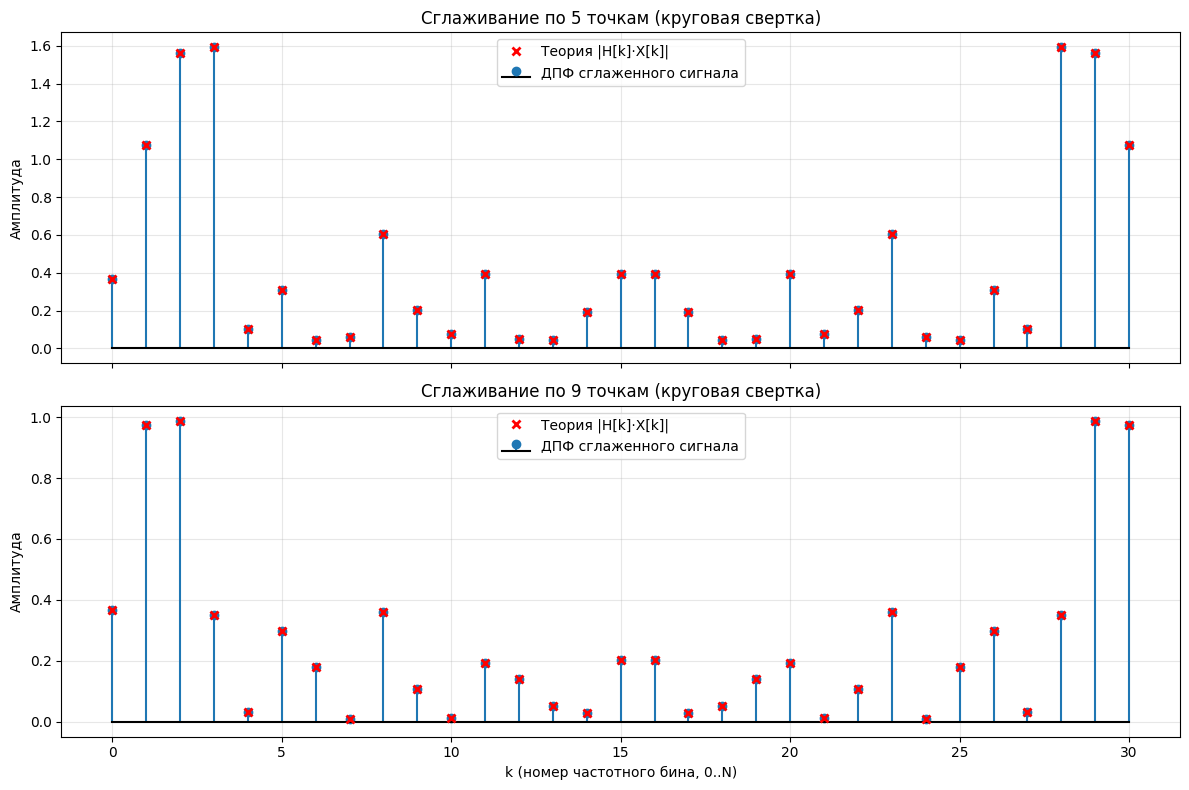

In [76]:
def H_moving_average_continuous(k, N_points, M):
    omega = k * 2 * np.pi / N_points  

    omega_half = omega / 2
    numerator = np.sin(omega_half * M)
    denominator = M * np.sin(omega_half)
    
    H = np.ones_like(omega, dtype=complex)
    mask = np.abs(denominator) > 1e-12
    H[mask] = numerator[mask] / denominator[mask]
    
    H *= np.exp(-1j * omega * (M-1) / 2)
    
    return H

N_points = len(x) 
k_bins = np.arange(N_points) 

H5_cont = H_moving_average_continuous(k_bins, N_points, 5)
H9_cont = H_moving_average_continuous(k_bins, N_points, 9)

Y5_theory = H5_cont * np.fft.fft(x)
Y9_theory = H9_cont * np.fft.fft(x)

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

Y5_actual = np.fft.fft(y5)
Y9_actual = np.fft.fft(y9)

for ax, Y_actual, Y_theory, window, title in zip(
    axes, 
    [Y5_actual, Y9_actual], 
    [Y5_theory, Y9_theory], 
    [5, 9],
    ["Сглаживание по 5 точкам (круговая свертка)", 
     "Сглаживание по 9 точкам (круговая свертка)"]
):
    ax.stem(k_bins, np.abs(Y_actual), linefmt='C0-', markerfmt='C0o', 
            basefmt='k-', label='ДПФ сглаженного сигнала')
    ax.plot(k_bins, np.abs(Y_theory), 'rx', markersize=6, 
            markeredgewidth=2, label='Теория |H[k]·X[k]|')
    ax.set_title(title)
    ax.set_ylabel("Амплитуда")
    ax.grid(True, alpha=0.3)
    ax.legend()

axes[-1].set_xlabel("k (номер частотного бина, 0..N)")
plt.tight_layout()
plt.show()

На графике наглядно видно, что теоретическая оценка совпадает со значениями сглаженного сигнала.

# Численное дифференцирование и интегрирование в дискретной области

## Численное дифференцирование (аппроксимации 1-го порядка)

Пусть входная дискретная последовательность $x[n]$. Рассмотрим три стандартных дискретных аппроксимации первой производной.

### Форвардная разность

$$
y[n] = x[n+1] - x[n]
$$

**Z-преобразование** (при допущении нулевых данных за пределами области рассмотрения):

$$
Y(z) = (z - 1)X(z) \quad \Rightarrow \quad H_{\text{fwd}}(z) = z - 1
$$

**Частотная характеристика** ($z = e^{j\omega}$):

$$
H_{\text{fwd}}(e^{j\omega}) = e^{j\omega} - 1 = e^{j\omega/2} \cdot 2j\sin\left(\frac{\omega}{2}\right)
$$

**Аппроксимация для малых $\omega$**:

$$
H_{\text{fwd}}(e^{j\omega}) \approx j\omega + O(\omega^2)
$$

**Порядок погрешности**: $O(T)$

---

### Назад-направленная разность (backward)

$$
y[n] = x[n] - x[n-1]
$$

**Z-преобразование**:

$$
H_{\text{back}}(z) = 1 - z^{-1}
$$

**Частотная характеристика**:

$$
H_{\text{back}}(e^{j\omega}) = 1 - e^{-j\omega} = e^{-j\omega/2} \cdot 2j\sin\left(\frac{\omega}{2}\right)
$$

**Аппроксимация для малых $\omega$**:

$$
H_{\text{back}}(e^{j\omega}) \approx j\omega + O(\omega^2)
$$

**Порядок погрешности**: $O(T)$ (фазовый сдвиг отличается от форвардной разности)

---

### Центральная разность (симметричная)

$$
y[n] = \frac{x[n+1] - x[n-1]}{2}
$$

**Z-преобразование**:

$$
H_{\text{cent}}(z) = \frac{z - z^{-1}}{2} = \frac{1}{2}z^{-1}(z^2 - 1)
$$

**Частотная характеристика**:

$$
H_{\text{cent}}(e^{j\omega}) = \frac{e^{j\omega} - e^{-j\omega}}{2} = j\sin\omega
$$

**Разложение в ряд Тейлора**:

$$
j\sin\omega \approx j\omega - j\frac{\omega^3}{6} + \cdots
$$

**Порядок погрешности**: $O(T^2)$

---


## Численное интегрирование

Рассмотрим шаг $T$ (в случае $T=1$ — упрощается). Приведём Z-характеристики и частотные выражения.

### Метод прямоугольников (накапливающий интегратор)

**Рекурсивная формула** (правый прямоугольник):

$$
y[n] = y[n-1] + T \cdot x[n]
$$

**Разностное уравнение**:

$$
y[n] - y[n-1] = T \cdot x[n]
$$

**Z-преобразование**:

$$
Y(z)(1 - z^{-1}) = T X(z) \quad \Rightarrow \quad H_{\text{rect}}(z) = \frac{T}{1 - z^{-1}}
$$

**Частотная характеристика**:

$$
H_{\text{rect}}(e^{j\omega}) = \frac{T}{1 - e^{-j\omega}} = \frac{Te^{j\omega/2}}{2j\sin(\omega/2)}
$$

**Поведение на низких частотах**:

$$
H_{\text{rect}}(e^{j\omega}) \approx \frac{T}{j\omega} \quad \text{(по модулю } |H| \approx T/\omega\text{)}
$$

**Порядок погрешности**: $O(T)$

**Замечание**: Полюс в $z=1$ (маргинальная устойчивость) — накопление при ненулевой средней составляющей.

---

### Метод трапеций (Tustin-интегратор)

**Формула**:

$$
y[n] = y[n-1] + \frac{T}{2}\left(x[n] + x[n-1]\right)
$$

**Разностное уравнение**:

$$
y[n] - y[n-1] = \frac{T}{2}\left(x[n] + x[n-1]\right)
$$

**Z-преобразование**:

$$
Y(z)(1 - z^{-1}) = \frac{T}{2}X(z)(1 + z^{-1}) \quad \Rightarrow \quad H_{\text{trap}}(z) = \frac{T}{2} \cdot \frac{1 + z^{-1}}{1 - z^{-1}}
$$

**Частотная характеристика**:

$$
H_{\text{trap}}(e^{j\omega}) = \frac{T}{2} \cdot \frac{1 + e^{-j\omega}}{1 - e^{-j\omega}} = -j\frac{T}{2}\cot\left(\frac{\omega}{2}\right)
$$

**Разложение для малых $\omega$**:

$$
\cot\left(\frac{\omega}{2}\right) \approx \frac{2}{\omega} - \frac{\omega}{6} + \cdots
$$

$$
H_{\text{trap}}(e^{j\omega}) \approx -j\frac{T}{\omega} + O(\omega)
$$

**Порядок погрешности**: $O(T^2)$

---

### Метод Симпсона

**Правило для интервала $[0, 2T]$** ($h = T$):

$$
\int_{0}^{2T} f(t) dt \approx \frac{T}{3}\left(f(0) + 4f(T) + f(2T)\right)
$$

**Дискретное представление** (для индексов $k, k+1, k+2$):

$$
I_{\text{block}} = \frac{T}{3}\left(x[k] + 4x[k+1] + x[k+2]\right)
$$

**Импульсная характеристика блока**:

$$
h_{\text{simp-block}}[m] = \frac{T}{3} \times 
\begin{cases}
1, & m = 0 \\
4, & m = 1 \\
1, & m = 2
\end{cases}
$$

**Z-преобразование блока**:

$$
H_{\text{simp-block}}(z) = \frac{T}{3}\left(1 + 4z^{-1} + z^{-2}\right)
$$

**Порядок погрешности**: $O(T^4)$ (высокая точность для гладких функций)

---

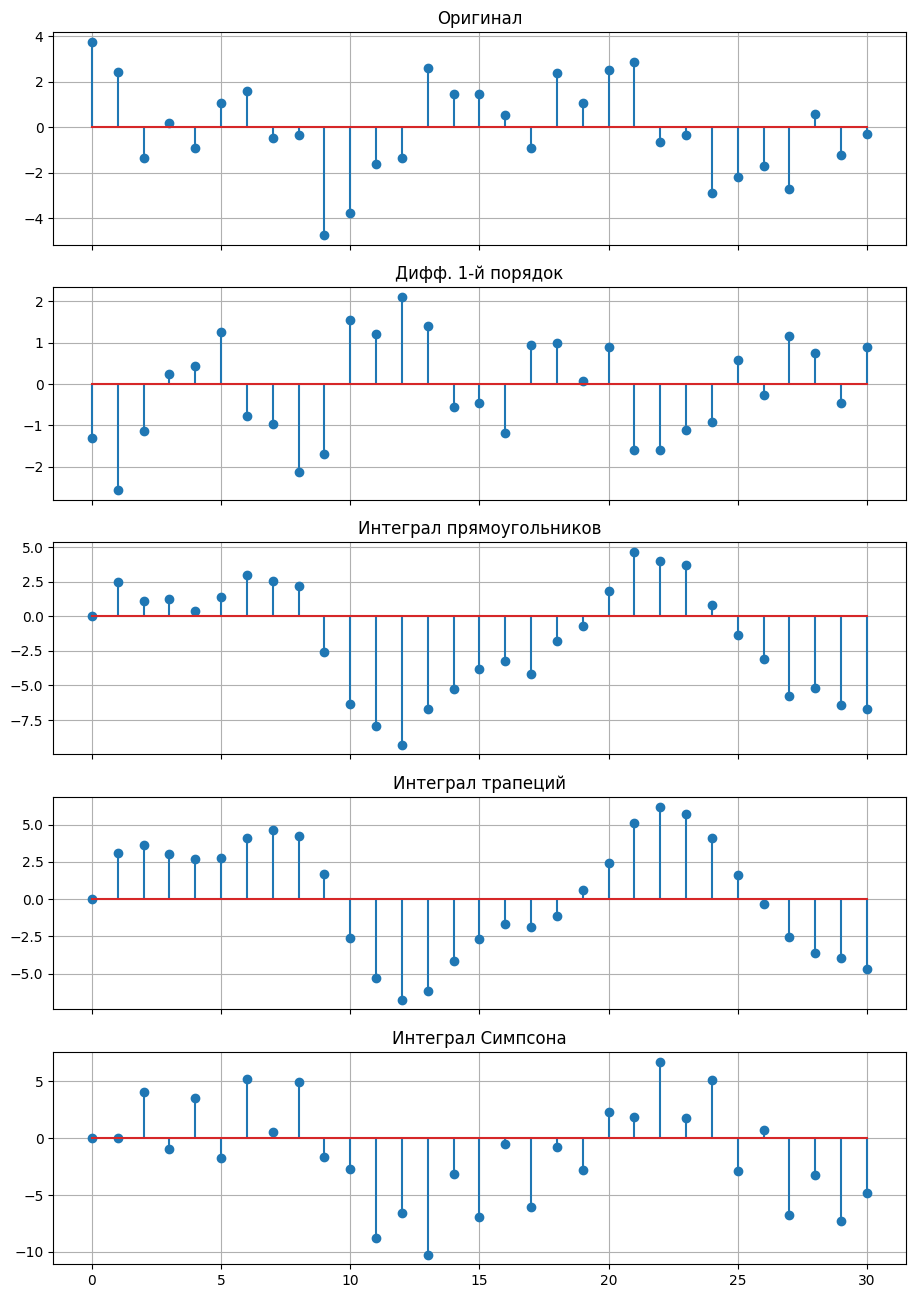

In [66]:
def diff_central(sig, T):
    out = np.zeros_like(sig)
    # центральная формула для всех внутренних точек
    out[1:-1] = (sig[2:] - sig[:-2]) * (0.5 / T)
    # для краёв — односторонние оценки
    out[0] = (sig[1] - sig[0]) / T
    out[-1] = (sig[-1] - sig[-2]) / T
    return out


def H_diff(omega, T):
    return 1j * np.sin(omega) / T

def integ_rect(sig, T):
    out = np.empty_like(sig)
    s = 0.0
    out[0] = 0.0
    for i in range(1, len(sig)):
        s += sig[i] * T
        out[i] = s
    return out

def H_integ_rect(omega, T):
    z = np.exp(-1j * omega)
    den = 1 - z
    H = np.empty_like(den, dtype=complex)
    mask = np.abs(den) > 1e-12  # обычные значения
    H[mask] = T / den[mask]
    H[~mask] = T  # предел при ω=0
    return H

def integ_trap(sig, T):
    out = np.zeros_like(sig)
    acc = 0.0
    for i in range(1, len(sig)):
        acc += 0.5 * (sig[i] + sig[i - 1]) * T
        out[i] = acc
    return out

def H_integ_trap(omega, T):
    z = np.exp(-1j * omega)
    num = 0.5 * T * (1 + z)
    den = 1 - z
    H = np.empty_like(den, dtype=complex)
    mask = np.abs(den) > 1e-12
    H[mask] = num[mask] / den[mask]
    H[~mask] = T  # предел при ω=0
    return H

def integ_simpson(sig, T):
    out = np.zeros_like(sig)
    # первые две точки нельзя считать по Симпсону
    for i in range(2, len(sig)):
        out[i] = out[i - 2] + (sig[i] + 4*sig[i-1] + sig[i-2]) * (T / 3)
    return out

def H_integ_simpson(omega, T):
    z = np.exp(-1j * omega)
    num = (T / 3.0) * (1 + 4*z + z*z)
    den = 1 - z*z
    H = np.empty_like(den, dtype=complex)
    mask = np.abs(den) > 1e-12
    H[mask] = num[mask] / den[mask]
    H[~mask] = T  # предел при ω=0
    return H

ops = [
    ("Оригинал", lambda x: x, lambda w: np.ones_like(w)),
    ("Дифф. 1-й порядок", diff_central, H_diff),
    ("Интеграл прямоугольников", integ_rect, H_integ_rect),
    ("Интеграл трапеций", integ_trap, H_integ_trap),
    ("Интеграл Симпсона", integ_simpson, H_integ_simpson),
]

fig, axs = plt.subplots(len(ops), 1, figsize=(11, 16), sharex=True)

omega = 2*np.pi*np.arange(len(x))/len(x)

for ax, (title, f_time, f_freq) in zip(axs, ops):
    y_proc = f_time(x.copy(), T) if title!="Оригинал" else x
    ax.set_title(title)
    ax.stem(np.arange(len(x)), y_proc)
    ax.grid(True)



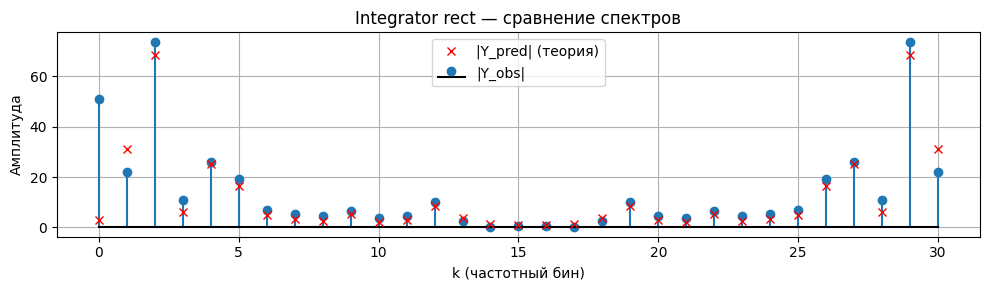

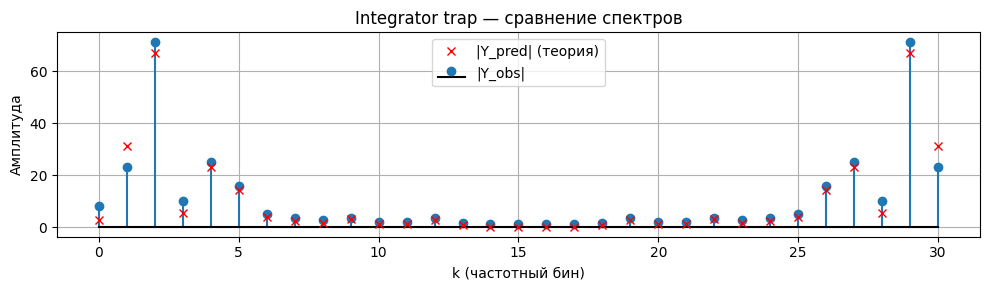

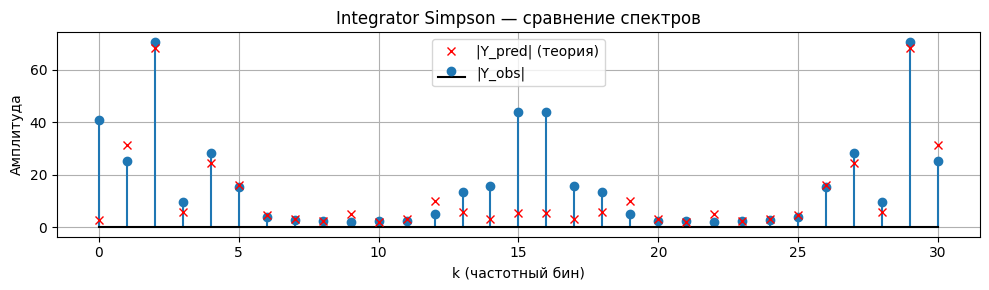

In [67]:
def analyze_filter_against_theory(time_func, Hfunc, x, T, N, name):
    # Дискретное время
    omega_k = 2*np.pi*np.arange(N)/N
    
    # ДПФ исходного сигнала
    X = np.fft.fft(x, n=N)
    
    # Фильтрация во временной области
    y_time = time_func(x, T)
    
    # ДПФ обработанного сигнала
    Y_obs = np.fft.fft(y_time, n=N)
    
    # Теоретическая частотная характеристика
    Hk = Hfunc(omega_k, T)
    Y_pred = Hk * X
    
    # Ошибки
    mag_err = np.abs(np.abs(Y_obs) - np.abs(Y_pred))
    rmse = np.sqrt(np.mean(mag_err**2))
    rel_err = np.mean(mag_err / (np.abs(Y_pred) + 1e-12))
    
    phase_diff = (np.angle(Y_obs) - np.angle(Y_pred) + np.pi) % (2*np.pi) - np.pi
    mean_phase_err = np.mean(np.abs(phase_diff))
    
    # График сравнения амплитуд
    plt.figure(figsize=(10,3))
    k = np.arange(N)
    plt.stem(k, np.abs(Y_obs),
             linefmt='C0-', markerfmt='C0o', basefmt='k-',
             label='|Y_obs|')
    plt.plot(k, np.abs(Y_pred), 'rx', label='|Y_pred| (теория)')
    plt.title(f'{name} — сравнение спектров')
    plt.xlabel("k (частотный бин)")
    plt.ylabel("Амплитуда")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    

analyze_filter_against_theory(integ_rect, H_integ_rect, x, T, N, "Integrator rect")
analyze_filter_against_theory(integ_trap, H_integ_trap, x, T, N, "Integrator trap")
analyze_filter_against_theory(integ_simpson, H_integ_simpson, x, T, N, "Integrator Simpson")



---
# **Вывод**

1. **Формирование сигнала.**
   Был сгенерирован непрерывный сигнал из одиннадцати косинусоид с частотами от 0 до π и случайными амплитудами и фазами. Дискретизация с шагом T = 1 дала дискретную последовательность из 32 точек, которая корректно повторяет форму исходного аналогового сигнала.

2. **Спектральный анализ исходного сигнала.**
   ДПФ показало наличие выраженных спектральных линий на тех частотах, где находились гармоники. Это подтверждает корректность синтеза и отсутствие искажений при дискретизации.

3. **Линейное сглаживание (5 и 9 точек).**
   Сигнал был отфильтрован окнами усреднения, и для каждого фильтра была записана частотная характеристика $(H(\omega))$. Полученные сглаженные сигналы стали более плавными, а высокочастотные компоненты заметно уменьшились — что полностью соответствует теоретическому поведению усредняющих фильтров.

4. **Сравнение спектров «до» и «после» линейного сглаживания.**
   Высокочастотные пики в спектре после фильтрации просажены в той степени, в которой предсказывает $(H(\omega))$. Окно из 9 точек подавляет высокие частоты сильнее, чем окно из 5 точек.

5. **Полиномиальные фильтры 2-й степени (5 и 9 узлов).**
   Эти фильтры сглаживают сигнал, но заметно лучше сохраняют форму, чем простое усреднение. Снижение высоких частот присутствует, но структура сигнала и «изгибы» остаются более точными.

6. **Полиномиальные фильтры 4-й степени (7 и 11 узлов).**
   Фильтры более высокого порядка ещё лучше сохраняют форму сигнала при сглаживании. Широкие окна дают более сильное подавление высоких частот, но при этом по минимуму искажают общую структуру.

7. **Интерпретация результатов.**

   * Скользящее среднее — сильное сглаживание, но сильное же искажение формы.
   * Полиномиальные фильтры — мягкое сглаживание при хорошем сохранении геометрии сигнала.
   * Увеличение окна всегда усиливает подавление высоких частот.
   * Все наблюдаемые изменения соответствуют аналитическим частотным характеристикам фильтров.

